In [1]:
import pandas as pd # libreria manipulacion de datos
import numpy as np # calculo numerico
import matplotlib.pyplot as plt # graficacion

## Datos Titanic


In [2]:
datos = pd.read_csv("Datos/titanic.csv")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explicación de datos

| Variable  | Definition  | Key  |
|---|---|---|
| survival  |  Sobreviviente |  0 = No, 1 = Yes |
| pclass  | Clase Ticket  | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex  | Sexo  |   |
|Age |Edad en años | |
|sibsp |# hermanas / cónyuges a bordo del Titanic | |
|parch |# padres / hijos a bordo del Titanic | |
|ticket |Numero de Ticket | |
|fare |Tarifa de pasajero  | |
|cabin|Número cabina |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## Nota sobre las variables

+ pclass: etiqueta de status socio-economico (SES)
    + 1st = Upper
    + 2nd = Middle
    + 3rd = Lower

+ edad: la edad es fraccionaria si es menor que 1. Si se estima la edad, ¿tiene la forma de xx.5

+ sibsp: El conjunto de datos define las relaciones familiares de esta manera ...
    + Hermano = hermano, hermana, hermanastro, hermanastra
    + Cónyuge = esposo, esposa (se ignoraron las amantes y los novios)

+ parch: El conjunto de datos define las relaciones familiares de esta manera ...
    + Padre = madre, padre
    + Niño = hija, hijo, hijastra, hijastro
    + Algunos niños viajaban solo con una niñera, por lo tanto parch = 0 para ellos.

In [3]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
plt.style.use('seaborn-poster')

Text(0.5, 1.0, 'Histograma de la edad')

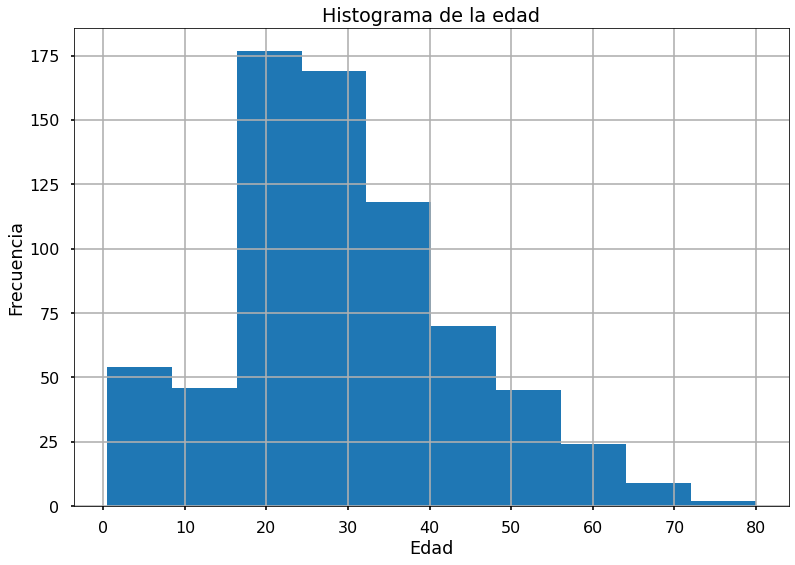

In [5]:
datos.Age.hist()
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad')

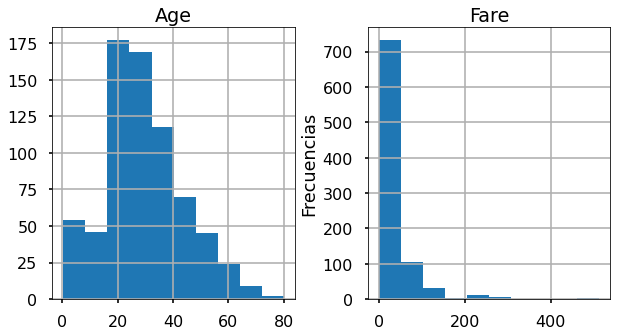

In [6]:
datos[['Age', 'Fare']].hist(bins=10, figsize=(10,5))
plt.ylabel('Frecuencias');

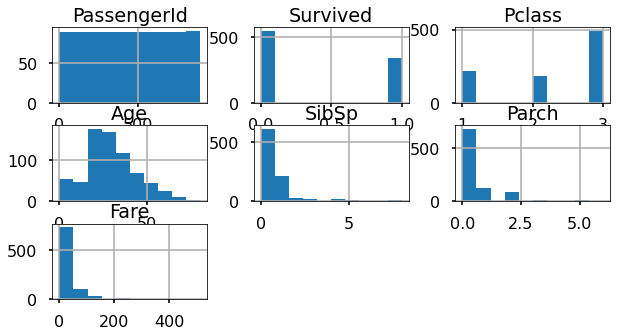

In [7]:
datos.hist(figsize=(10,5));

In [8]:
datos.median()   ### mediana

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [9]:
datos.mean()    ### promedio

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [10]:
datos[['Age', 'Fare']].mode()

,Age,Fare
0,24.0,8.05


In [11]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#quantil 75
datos.quantile(np.arange(0,1,0.1))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.0,1.0,0.0,1.0,0.42,0.0,0.0,0.0000
0.1,90.0,0.0,1.0,14.00,0.0,0.0,7.5500
0.2,179.0,0.0,1.0,19.00,0.0,0.0,7.8542
0.3,268.0,0.0,2.0,22.00,0.0,0.0,8.0500
0.4,357.0,0.0,2.0,25.00,0.0,0.0,10.5000
0.5,446.0,0.0,3.0,28.00,0.0,0.0,14.4542
0.6,535.0,0.0,3.0,31.80,0.0,0.0,21.6792
0.7,624.0,1.0,3.0,36.00,1.0,0.0,27.0000
0.8,713.0,1.0,3.0,41.00,1.0,1.0,39.6875
0.9,802.0,1.0,3.0,50.00,1.0,2.0,77.9583


In [13]:
df_temp = datos.Sex.value_counts(normalize=True)
df_temp

male      0.647587
female    0.352413
Name: Sex, dtype: float64

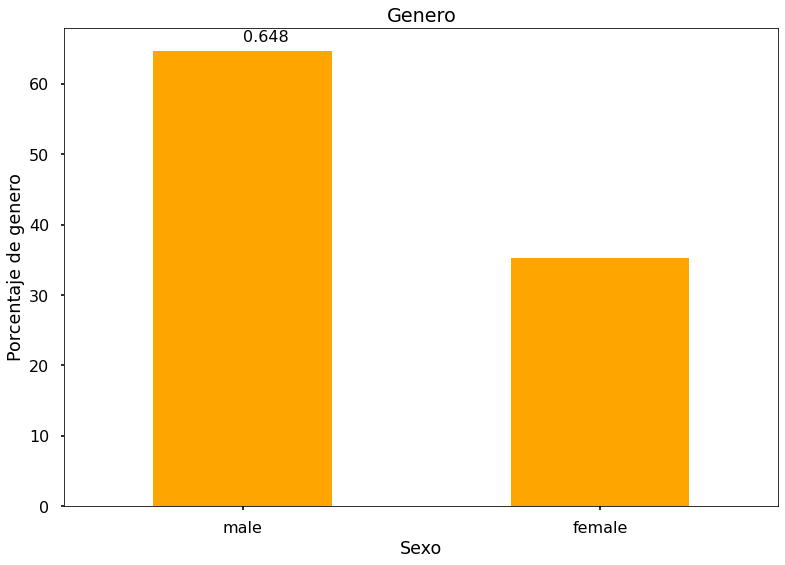

In [14]:
(datos.Sex.value_counts(normalize = True) * 100).plot.bar(rot=0,
                                                        color='orange')
plt.text(0,66,'%1.3f' % df_temp.loc['male'], fontsize=16)
plt.title('Genero')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de genero');

#### dataframe original (con vivos/muertos)
#### filtro todos los registros con edad mayor al quantil 75

In [15]:
df = datos[datos.Age > datos.Age.quantile(0.75)]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


#### El promedio de edad

In [16]:
df.Age.mean()

49.29943502824859

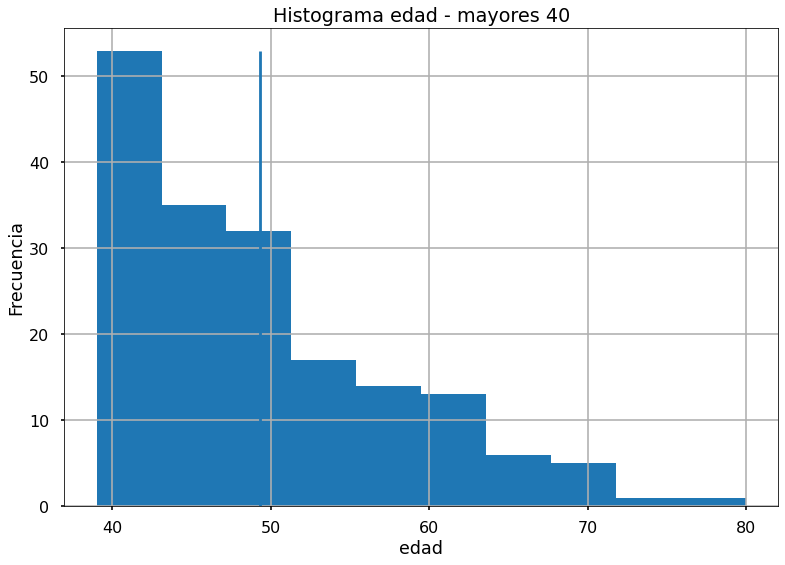

In [17]:
df.Age.hist()
plt.title('Histograma edad - mayores 40')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.vlines(df.Age.mean(),0,53)

<AxesSubplot:>

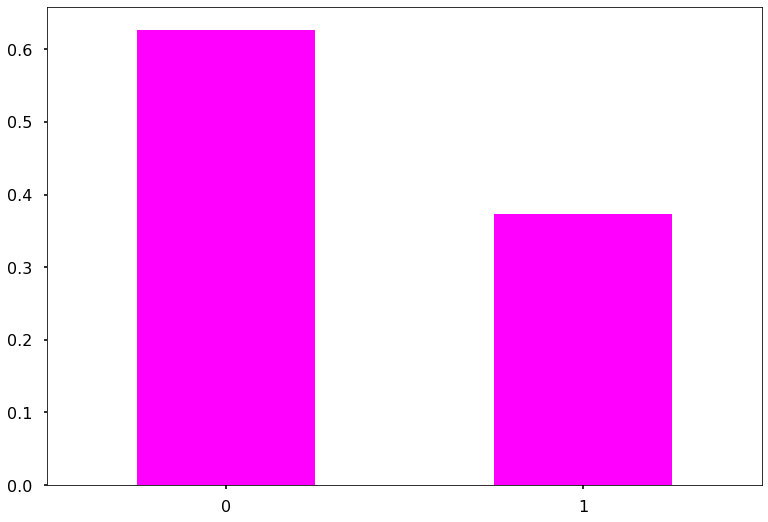

In [18]:
df.Survived.value_counts(normalize=True).plot.bar(rot=0, 
                                                  color='magenta')


### Poco menos del 40% de los mayores de 40 años sobrevivieron

<AxesSubplot:xlabel='Pclass'>

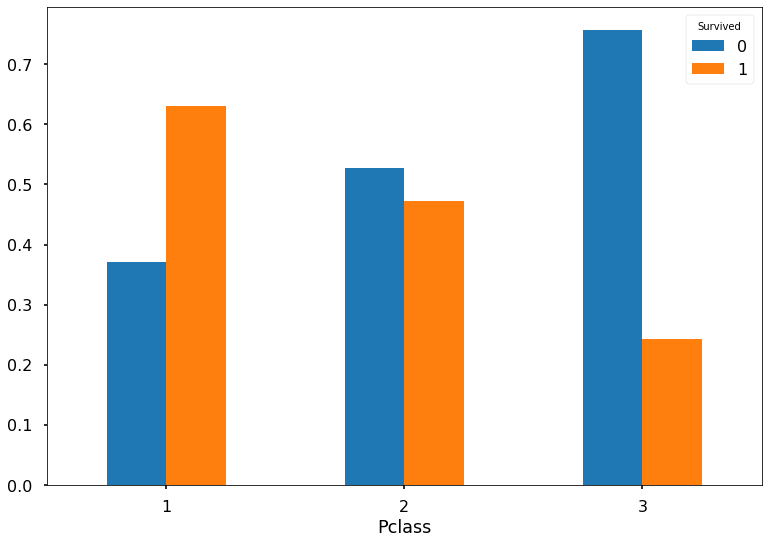

In [19]:
datos.groupby('Pclass').Survived.value_counts(
    normalize=True).unstack().plot.bar(rot=0)

### La mayor cantidad de sobrevivientes se dio en clase 1, mientras la clase 3 se vio mas afectada

<AxesSubplot:xlabel='Sex'>

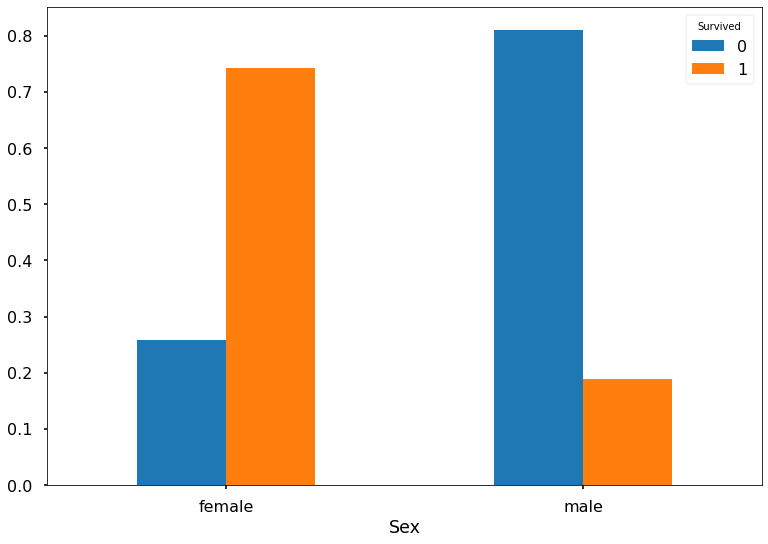

In [20]:
datos.groupby('Sex').Survived.value_counts(
    normalize=True).unstack().plot.bar(rot=0)

### Mayor cantidad de sobrevivientes , mujeres 

<AxesSubplot:xlabel='Sex,Survived'>

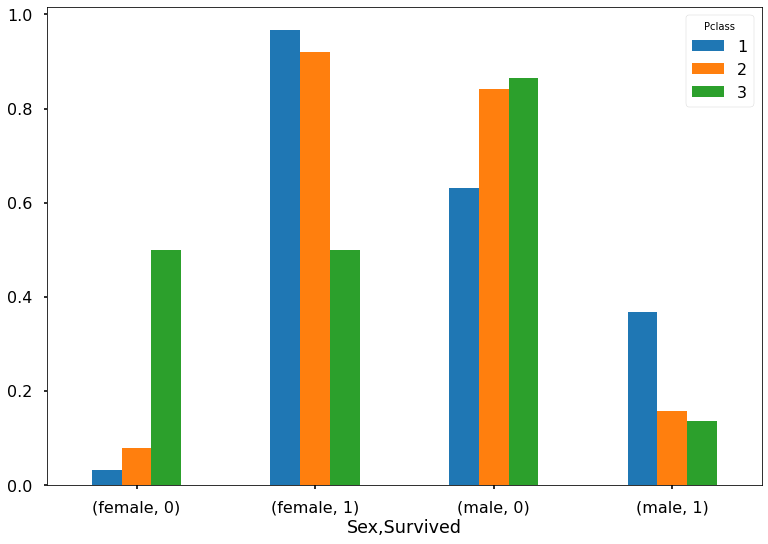

In [21]:
datos.groupby(['Sex','Pclass']).Survived.value_counts(
    normalize=True).unstack(1).plot.bar(stacked=False,rot=0)

<AxesSubplot:xlabel='Sex'>

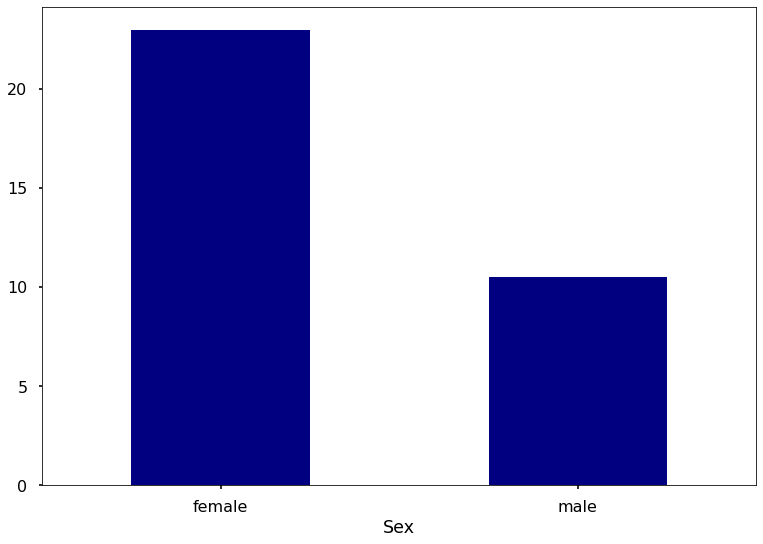

In [22]:
datos.groupby('Sex').Fare.median().plot.bar(rot=0,color='navy')

female
male


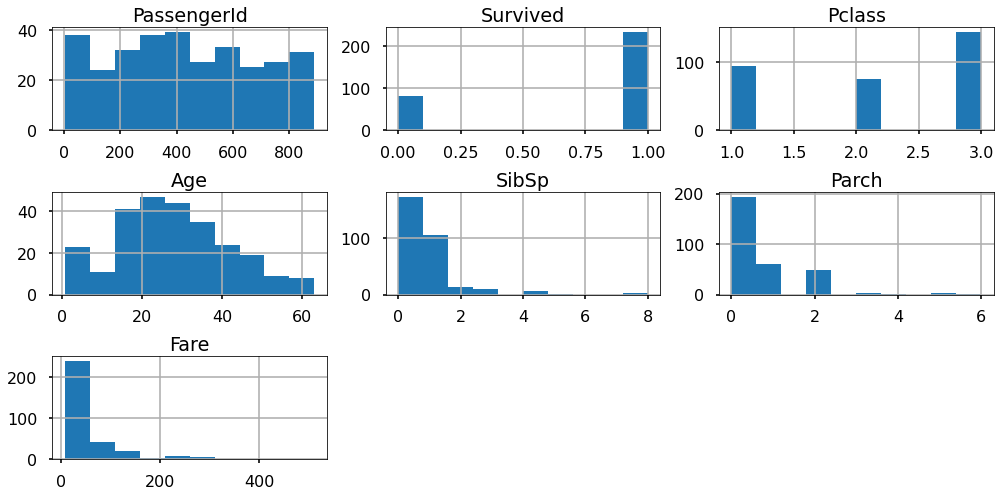

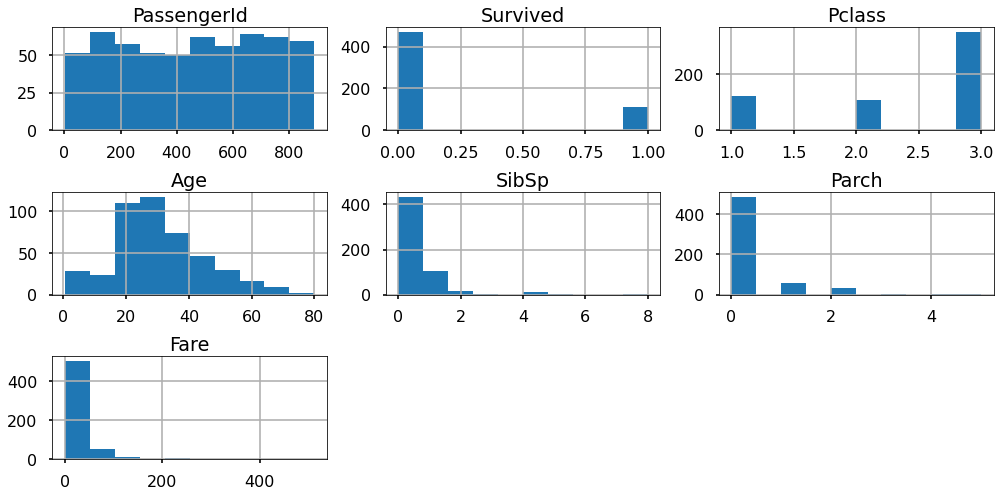

In [23]:
for i in datos.groupby('Sex'):
    print(i[0])
    i[1].hist(figsize=(14,7))
    plt.tight_layout()
    print('=='*40)